In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import joblib

In [3]:
# Load the dataset
df = pd.read_csv('construction_crack_monitoring_dataset.csv')

In [4]:
# Display the first few rows of the dataset
df.head()

,temperature,humidity,moisture,weight,vibration_sensor,accel_x,accel_y,accel_z,status
0,31.116354,38.778494,30.870605,813.924724,0.864701,0.263756,-2.668558,8.856434,Crack Detected
1,29.712411,57.927402,24.068114,1161.364923,0.398059,0.139612,0.781581,8.732984,Normal
2,33.782823,39.437296,7.699223,948.556122,0.550554,0.276295,0.293125,9.784058,Normal
3,21.967115,56.729702,30.977525,1005.704030,0.106471,1.498388,0.940668,10.267952,Normal
4,23.158425,47.716392,30.455680,1103.536839,0.300354,-0.361662,-0.203055,9.813739,Normal


In [5]:
# Check for missing values
print(df.isnull().sum())

temperature         0
humidity            0
moisture            0
weight              0
vibration_sensor    0
accel_x             0
accel_y             0
accel_z             0
status              0
dtype: int64


status
Crack Detected    5000
Normal            5000
Name: count, dtype: int64


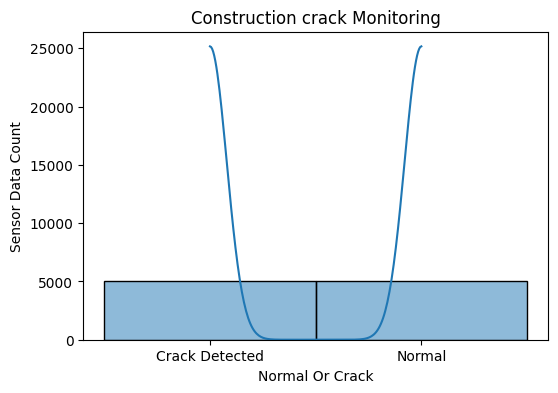

In [6]:
# Display distribution of Construction crack Monitoring
print(df['status'].value_counts())
plt.figure(figsize=(6, 4))
sns.histplot(df['status'], bins=30, kde=True)
plt.title('Construction crack Monitoring')
plt.xlabel('Normal Or Crack')
plt.ylabel('Sensor Data Count')
plt.show()


Correlation Matrix:
                  temperature  humidity  moisture    weight  vibration_sensor  \
temperature          1.000000  0.057569  0.003102  0.054257         -0.067693   
humidity             0.057569  1.000000  0.029355 -0.079111         -0.011435   
moisture             0.003102  0.029355  1.000000  0.022776         -0.047750   
weight               0.054257 -0.079111  0.022776  1.000000         -0.447386   
vibration_sensor    -0.067693 -0.011435 -0.047750 -0.447386          1.000000   
accel_x              0.145701  0.135334  0.178273  0.062387         -0.004918   
accel_y              0.088746 -0.042594  0.008075  0.088361         -0.056898   
accel_z              0.159867  0.167647 -0.150101  0.052073         -0.058857   

                   accel_x   accel_y   accel_z  
temperature       0.145701  0.088746  0.159867  
humidity          0.135334 -0.042594  0.167647  
moisture          0.178273  0.008075 -0.150101  
weight            0.062387  0.088361  0.052073  
vibr

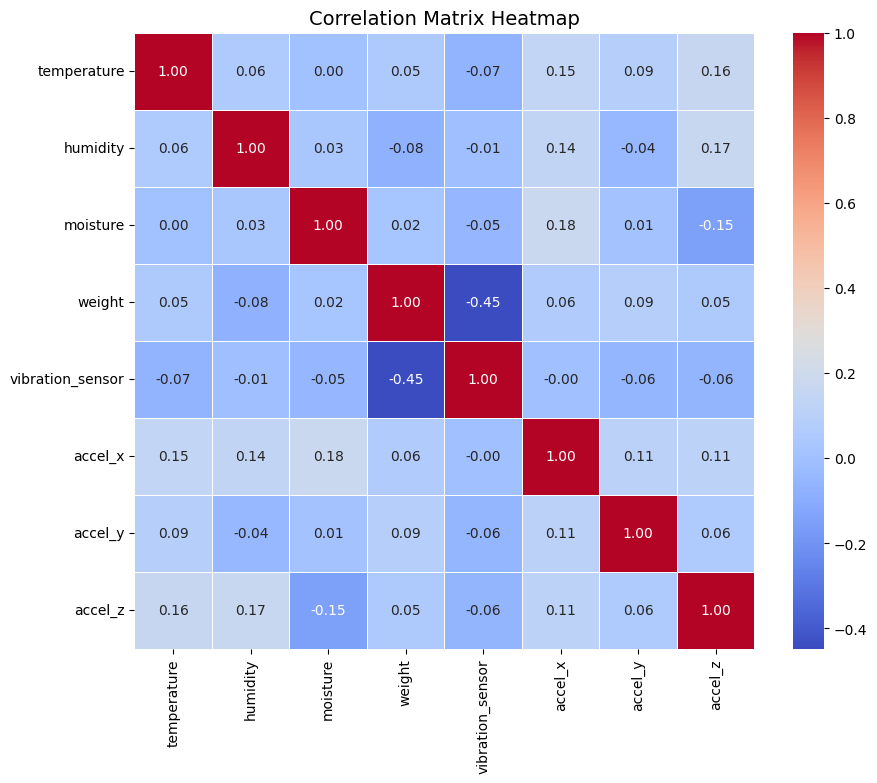

In [7]:
# Filter out non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate and display the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()


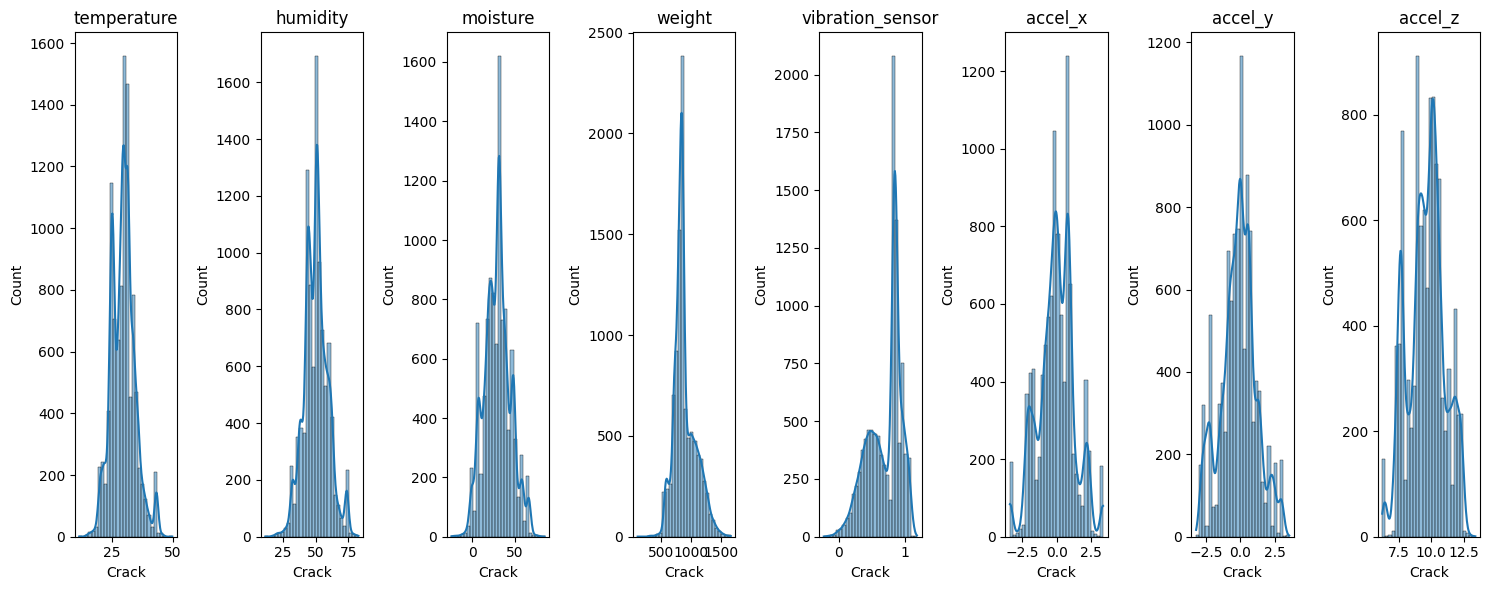

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of individual features
plt.figure(figsize=(15, 6))
columns = ['temperature', 'humidity', 'moisture', 'weight', 'vibration_sensor', 'accel_x', 'accel_y', 'accel_z'] 

for i, column in enumerate(columns, start=1):
    plt.subplot(1, 8, i)  # 1 row, 8 columns, subplot index i
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(column)
    plt.xlabel('Crack')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [9]:
# Encode the target variable
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])


In [10]:
import joblib
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [11]:
# Split the data into features and target
X = df.drop(columns=['status'])
y = df['status']


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf) * 100  # Convert to percentage
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       987
           1       1.00      1.00      1.00      1013

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [15]:
# Save the trained models and scaler
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred_gb) * 100  # Convert to percentage
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}%")
print(classification_report(y_test, y_pred_gb))
joblib.dump(gb_model, 'gb_model.pkl')


Gradient Boosting Accuracy: 99.90%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       987
           1       1.00      1.00      1.00      1013

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



['gb_model.pkl']

In [17]:
import pandas as pd
import joblib  # For loading .pkl files

# Load the trained Random Forest model, scaler, and label encoder
rf_model = joblib.load('rf_model.pkl')  # Replace with the correct path if needed
scaler = joblib.load('scaler.pkl')     # Replace with the correct path if needed
label_encoder = joblib.load('label_encoder.pkl')  # Replace with the correct path if needed

def disaster(temperature, humidity, moisture, weight, vibration_sensor, accel_x, accel_y, accel_z):

    # Create a DataFrame from the input values
    new_data = pd.DataFrame({
        'temperature': [temperature],
        'humidity': [humidity],
        'moisture': [moisture],
        'weight': [weight],
        'vibration_sensor': [vibration_sensor],
        'accel_x': [accel_x],
        'accel_y': [accel_y],
        'accel_z': [accel_z],

    })
    
    # Scale the new data using the loaded scaler
    new_data_scaled = scaler.transform(new_data)
    
    # Make predictions using the loaded Random Forest model
    dt_prediction = rf_model.predict(new_data_scaled)
    
    # Convert numerical prediction back to the original label
    result = label_encoder.inverse_transform(dt_prediction)
    
    return result[0]

# Main function to get input from the user and display the prediction
if __name__ == "__main__":
    print("Enter sensor values for prediction:")
    
    try:
        # Get user input
        temperature = float(input("temperature: "))
        humidity = float(input("humidity: "))
        moisture = float(input("moisture: "))
        weight = float(input("weight: "))
        vibration_sensor = float(input("vibration_sensor: "))
        accel_x = float(input("accel_x: "))
        accel_y = float(input("accel_y: "))
        accel_z = float(input("accel_z: "))
        
        # Predict the disaster type
        predicted_result = disaster(temperature, humidity, moisture, weight, vibration_sensor, accel_x, accel_y, accel_z)
        
        # Display the prediction
        print("\nPredicted Result:", predicted_result)
    except Exception as e:
        print("\nError:", str(e))


Enter sensor values for prediction:


temperature:  56
humidity:  12
moisture:  58
weight:  2000
vibration_sensor:  12
accel_x:  3
accel_y:  4
accel_z:  8



Predicted Result: Normal
